[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/blog/blob/master/012_perceptron1/perceptron1.ipynb)

# El Perceptrón

En los posts anteriores hemos ido viendo los diferentes elementos que necesitamos para desarrollar e implementar nuestros algoritmos de `Inteligencia Artificial`. Empezamos aprendiendo [Python](https://sensioai.com/blog/001_python), el lenguaje de programación más utilizando para el análisis de datos. Seguimos con la librería [Numpy](https://sensioai.com/blog/007_numpy), muy útil para el cálculo numérico. También hemos hablado de los conceptos matemáticos fundamentales que tenemos que conocer en nuestro viaje por el mundo del `Machine Learning`: [Álgebra](https://sensioai.com/blog/009_algebra_lineal) lineal, [probabilidad](https://sensioai.com/blog/010_probabilidad) y [cálculo](https://sensioai.com/blog/011_calculo) numérico. En este post vamos a utilizar todos estos conceptos para implementar nuestro primer algoritmo de IA. el `Perceptrón`.

## Redes Neuronales biológicas

El `Perceptrón` es la unidad de computación básica utilizada en las redes neuronales, aunque también puede usarse por si solo como algoritmo de IA en algunos casos. Está inspirado en el funcionamiento de las neuronas biológicas, y fue propuesto en 1957 por Frank Rosenblatt.

![](https://camo.githubusercontent.com/0e620aed5352f0795b454bbfb440c91137b16914/68747470733a2f2f636f6d707363693639376c2e6769746875622e696f2f6173736574732f6e6e312f6e6575726f6e2e706e67)

Una neurona está compuesta de un cuerpo celular que contiene el núcleo y la mayoría de los componentes complejos de la célula, muchas extensiones ramificadas llamadas dendritas y una extensión muy larga llamada axón. Cerca de su extremidad, el axón se divide en ramas llamadas telodendria, y en la punta de estas ramas encontramos estructuras minúsculas llamadas terminales sinápticas (o simplemente sinapsis), que están conectadas a las dendritas o cuerpos celulares de otras neuronas. Las neuronas biológicas producen impulsos eléctricos cortos llamados potenciales de acción (o simplemente señales) que viajan a lo largo de los axones y hacen que las sinapsis liberen señales químicas llamadas neurotransmisores. Cuando una neurona recibe una cantidad suficiente de estos neurotransmisores en unos pocos milisegundos, dispara sus propios impulsos eléctricos. Aunque las neuronas individuales parecen comportarse de manera bastante simple, pueden conectarse a miles de otras neuronas formando redes complejas que pueden realizar tareas complejas.

## El Perceptrón

El `Perceptrón` es una versión simplificada de la neurona que calcula la suma ponderada de todas sus entradas y después aplica una `función de activación` para dar el resultado

$$ \hat{y} = f(\mathbf{w} \cdot \mathbf{x}) = f(w_0 + w_1 x_1 + ... + w_m x_m) $$

dónde $\hat{y}$ es la salida del `Perceptrón`, $\mathbf{w}$ son sus parámetros (también llamados los pesos), $\mathbf{x}$ son las entradas y $f$ es la función de activación. A continuación puedes ver un espuema del `Perceptrón`, puedes compararlo con el esquema de la neurona biológica para evaluar sus parecidos y diferencias.

![perceptron](https://www.researchgate.net/profile/Shibani_Singh2/publication/321141639/figure/fig2/AS:572731935727616@1513561342872/Schematic-of-Rosenblatts-perceptron.png)


## Regresión Lineal

Existen varias tareas que podemos llevar a cabo con un `Perceptrón`. En este post vamos a ver una de ellas: `regresión lineal`. En este tipo de tarea, como en cualquier tarea de regresión, queremos obtener un modelo que se ajuste de la mejor forma posible a un conjunto de datos determinado. En el caso de la regresión lineal, este modelo será una línea recta y el `Perceptrón`, utilizando una función de activación lineal, $f(x) = x$, es de hecho capaz de llevar a cabo esta tarea. 

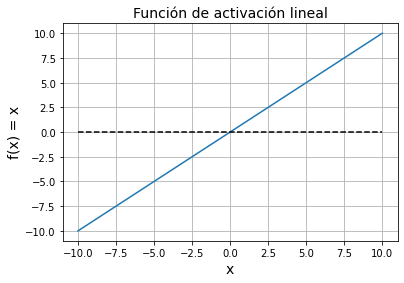

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10)
y = x

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = x', fontsize=14)
plt.title('Función de activación lineal', fontsize=14)
plt.plot(x, np.zeros(len(x)), '--k')
plt.show()

> 💡 Utilizar una función de activación lineal es como no utilizar ninguna función de activación, ya que la salida del Perceptrón será directamente el producto de las entradas por los pesos, $\hat{y} = \mathbf{w} \cdot \mathbf{x}$.

Para ilustrar cómo funciona el `Perceptrón` para tareas de regresión lineal, vamos a utilizar el siguiente dataset sintético.

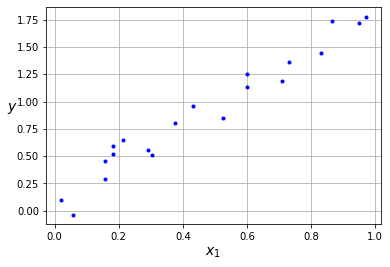

In [3]:
np.random.seed(42)

x = np.random.rand(20)
y = 2*x + (np.random.rand(20)-0.5)*0.5

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

Para empezar de manera sencilla, vamos a considerar que sólo tenemos una característica que usaremos como entrada para nuestro `Perceptrón`, $x_1$. El objetivo es que el `Perceptrón`, al recibir cada uno de estos valores, nos de como salida un valor lo más cercano posible a $y$. En este caso, al tener una sola característica por elemento, nuestro `Perceptrón` sigue la siguiente expresión

$$ \hat{y} = \mathbf{w} \cdot \mathbf{x} = w_0 + w_1 x_1 $$

En el caso en que $w_0 = 0$ y $w_1 = 2$, $\hat{y} = 2 x$, lo cual podemos representar como una recta. En el caso de querer conocer el valor de $y$ para un nuevo elemento, por ejemplo $x_1=0.5$, simplemente tenemos que calcular su valor haciendo regresión a nuestra recta, en este caso $\hat{y} = 1$. Un ejemplo de aplicación de este tipo de modelos de regresión es la predicción del precio de un inmueble ($\hat{y}$) dadas una serie de características como su localización ($x_1$), metros cuadrados ($x_2$), número de habitaciones ($x_3$), etc. Tener un buen modelo de regresión para esta aplicación nos puede ayudar a saber si una casa en venta está por encima o por debajo de su valor real ayudándonos a tomar mejores decisiones de inversión.

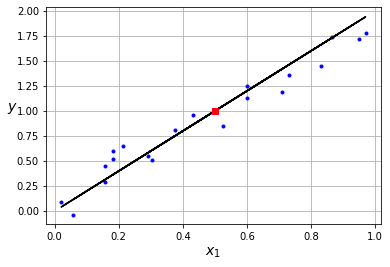

In [16]:
plt.plot(x, y, "b.")
plt.plot(x, 2*x, 'k')
plt.plot(0.5, 2*0.5, 'sr')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

En este ejemplo sabemos que los pesos de nuestro modelo son $w_0 = 0$ y $w_1 = 2$ ya que son los mismos utilizados para generar los datos. Sin embargo, nuestro objetivo será el de encontrar estos valores utilizando el algoritmo de `descenso por gradiente`.

## Entrenando el Perceptrón

En esta Notebook ya vamos a usar el de descenso por gradiente. Aquí vamos a aplicarlo para entrenar el `Perceptrón`. Nuestro objetivo es el de encontrar los pesos de nuestro modelo, $\mathbf{w}$, que minimicen una `función de pérdida`. Esta función nos da una medida del `error` que comete nuestro modelo al predecir los datos de nuestro dataset. En tareas de regresión, la función de pérdida más utilizada es el `error medio cuadrático` o `mean square loss` (MSE) en inglés.

$$ MSE(\hat{y},y)  = \frac{1}{N} \sum^{N}_{j=1} (\hat{y}^{(j)} - y^{(j)})^2 $$

dónde $N$ es el número de muestras del dataset. Esta función recibe las predicciones de nuestro modelo para los datos del dataset, $\hat{y}^{(j)}$, y las compara con los valores reales (*ground truth*), $y^{(j)}$, calculando el valor medio de la diferencia para cada elemento del dataset elevada al cuadrado. 

![](https://camo.githubusercontent.com/80b245209743990aa244cbae262d15ba16997fbf/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3630302f312a694e50486343784976636d3752776b52614d547831672e6a706567)

El algoritmo de descenso por gradiente se implementa de la forma siguiente:

1. Calcular la salida del modelo, $\hat{y}$.
2. Calcular la derivada de la función de pérdida con respecto a los parámetros del modelo, $\frac{\partial MSE}{\partial w} = \frac{2}{N} \frac{\partial \hat{y}}{\partial w} (\hat{y} - y) $ dónde $\frac{\partial \hat{y}}{\partial w} = x$.
3. Actualizar los parámetros, $w \leftarrow w - \eta \frac{\partial MSE}{\partial w}$, dónde $\eta$ es el *learning rate*.
4. Repetir hasta converger.

Inicializaremos nuestro modelo con unos valores aleatorios para los pesos, e iremos actualizando sus valores de manera iterativa en la dirección de pendiente negativa de la función de pérdida. El algoritmo termina cuando observemos que el valor de la función de pérdida deja de mejorar (indicando que habremos llegado a un mínimo local de nuestra función de pérdida).



In [29]:
def gradient(w, x, y): 
    # calculamos la derivada de la función de pérdida
    # con respecto a los parámteros `w`
    dldw = x * w - y
    dydw = x
    dldw = dldw * dydw
    return np.mean(2*dldw)

def cost(y, y_hat): 
    # calculamos la función de pérdida
    return ((y_hat - y)**2).mean()

def solve(epochs = 29, w = 1.2, lr = 0.2):
    # iteramos un número determinado de `epochs`
    # por cada epoch, calculamos gradientes y 
    # actualizamos los pesos
    weights = [(w, gradient(w, x, y), cost(x*w, y))]
    for i in range(1,epochs+1):
        dw = gradient(w, x, y)
        w = w - lr*dw
        weights.append((w, dw, cost(x*w, y)))
    return weights

In [30]:
from matplotlib import animation, rc
rc('animation', html='html5')

def init_fig(x, t, ws, cost_ws):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax2.plot(x, t, 'bo', label='y')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 2])
    ax2.set_xlabel('$x$', fontsize=15)
    ax2.set_ylabel('$y$', fontsize=15)
    ax2.yaxis.set_label_position('right')
    ax2.set_title('datos & modelo', fontsize=18)
    line2, = ax2.plot([], [], 'k-', label='$\hat{y}=x*w$')
    ax2.legend(loc=2)
    ax1.plot(ws, cost_ws, 'r-', label='MSE')
    ax1.set_ylim([0, 0.25])
    ax1.set_xlim([1, 2.75])
    ax1.set_xlabel('$w$', fontsize=15)
    ax1.set_ylabel('$MSE = 1 / N \sum (\hat{y}-y)^2$', fontsize=15)
    cost_text = ax1.set_title('$MSE_{}$'.format(0), fontsize=18)
    line1, = ax1.plot([], [], 'k:', label='derivada en $w$')
    pc_dots, = ax1.plot([], [], 'ko')
    ax1.legend(loc=2)
    ax1.grid(True)
    ax2.grid(True)
    return fig, ax1, ax2, line1, line2, pc_dots, cost_text

def get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights):
    xs = np.linspace(0, 4, num=100) 
    def anim(i):
        if i == 0:
            return [line1, line2, pc_dots, cost_text]
        (w, dw, cost) = weights[i-1]
        cost_text.set_text('$MSE_{{{}}} = {:.3f}$'.format(i, cost))
        ws, _, cs = zip(*weights[0:i])
        pc_dots.set_xdata(ws)
        pc_dots.set_ydata(cs)
        abline_values = [dw * (x-w) + cost for x in xs]
        line1.set_xdata(xs)
        line1.set_ydata(abline_values)
        # Plot fit
        # plot the fitted line
        line2.set_xdata([0, 1])
        line2.set_ydata([0*w, 1*w])
        ax2.legend(loc=2)
        return [line1, line2, pc_dots, cost_text]
    return anim

ws = np.linspace(0, 4, num=100)  
cost_ws = np.vectorize(lambda w: cost(x*w, y))(ws)  
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)

def compute_anim(weights):
    animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
    anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
    plt.close()
    return anim
    
weights = solve()
anim = compute_anim(weights)
anim

Como puedes observar, el algoritmo va actualizando los pesos del modelo en aquella dirección que minimice la función de pérdida (figura de la izquierda). Una vez encontramos los valores óptimos, podemos representar nuestro modelo (figura de la derecha) y utilizarlo para generar nuevas predicciones. 

In [6]:
# útlimo peso obtenido

w = weights[-1][0]
w

1.8648014707003089

In [7]:
# nueva predicción

x_new = 0.5
y_new = w*x_new
y_new

0.9324007353501544

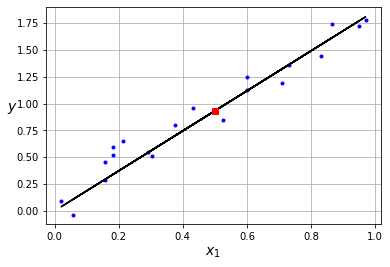

In [8]:
plt.plot(x, y, "b.")
plt.plot(x, w*x, 'k')
plt.plot(0.5, w*0.5, 'sr')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

Como podrás intuir, este sencillo modelo sólo será útil en el caso de tener un conjunto de datos que puedan ser representados por un modelo lineal. Cuando éste no sea el caso (lo cual ocurrirá en la mayoría de casos) necesitaremos modelos más potentes (que . Esta es la principal limitación del `Perceptrón`.

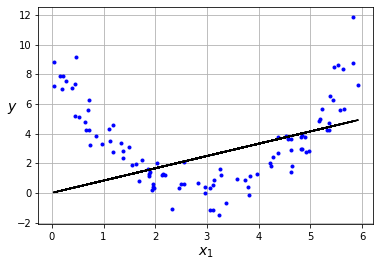

In [9]:
m = 100
x = 6 * np.random.rand(m, 1) 
y = (x - 3)**2 + np.random.randn(m, 1)

weights = solve(lr=0.01)
w = weights[-1][0]

plt.plot(x, y, "b.")
plt.plot(x, w*x, '-k')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

## Resumen

En esta Notebook hemos introducido nuestro primer modelo de `Machine Learning`: el `Perceptrón`. Este modelo está inspirado en el funcionamiento de las neuronas biológicas, recibiendo señales de entradas, llevando a cabo una serie de cálculos y dando un resultado como salida. En el caso del `Perceptrón`, calculamos la suma ponderada de todas sus entradas y luego aplicamos una función de activación sobre el resultado para calcular la salida. La aplicación más sencilla del `Perceptrón` es la regresión lineal, dónde intentaremos encontrar una línea que represente un conjunto de datos determinados. Para encontrar los pesos del modelo que mejor representen el dataset, usamos el algoritmo de descenso por gradiente. En este algoritmo, calcularemos la salida del modelo, derivamos la función de pérdida con respecto a los pesos del modelo los cuales actualizamos en la dirección de derivada negativa para minimizar de manera iterativa la función de pérdida. 